# 🛒 Supermarket Sales Analysis

**Tools:** Python (Pandas, Matplotlib, Seaborn)  
**Dataset:** Supermarket Sales Dataset

## Objective
Analyze supermarket sales data to understand performance across product lines, branches, and time, and extract actionable business insights.

## Dataset Overview
The dataset contains transactional sales data including product categories, branches, sales values, dates, customer ratings, and payment methods.

## Exploratory Data Analysis (EDA)
Initial exploration was performed to understand data structure, validate data types, check for missing values, and generate statistical summaries.

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [74]:
df = pd.read_csv("supermarket_sales.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Sales                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [30]:
df.describe()

,Unit price,Quantity,Tax 5%,Sales,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


## Data Preparation
Date was converted to datetime format, and a new Month feature was created to support time-based analysis.

In [73]:
df["Date"] = pd.to_datetime(df["Date"])
df["Month"] = df["Date"].dt.month

## Visual Analysis
Visualizations were created to compare sales performance across product lines and branches, analyze monthly sales trends, and explore sales distribution.

In [48]:
Product_Sales = (df.groupby("Product line")["Sales"].sum().sort_values(ascending=False))
Product_Sales

Product line
Food and beverages        56144.8440
Sports and travel         55122.8265
Electronic accessories    54337.5315
Fashion accessories       54305.8950
Home and lifestyle        53861.9130
Health and beauty         49193.7390
Name: Sales, dtype: float64

In [52]:
Branch_Sales = (df.groupby("Branch")["Sales"].sum().sort_values(ascending=False))
Branch_Sales

Branch
Giza     110568.7065
Alex     106200.3705
Cairo    106197.6720
Name: Sales, dtype: float64

In [51]:
Monthly_Sales = (df.groupby("Month")["Sales"].sum())
Monthly_Sales

Month
1    116291.868
2     97219.374
3    109455.507
Name: Sales, dtype: float64

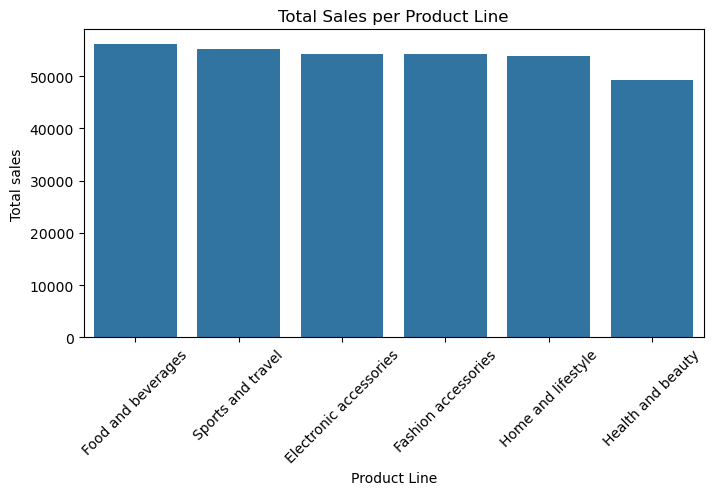

In [60]:
plt.figure(figsize=(8,4))
sns.barplot(x=Product_Sales.index, y=Product_Sales.values)
plt.xticks(rotation=45)
plt.title("Total Sales per Product Line")
plt.xlabel("Product Line")
plt.ylabel("Total sales")
plt.show()

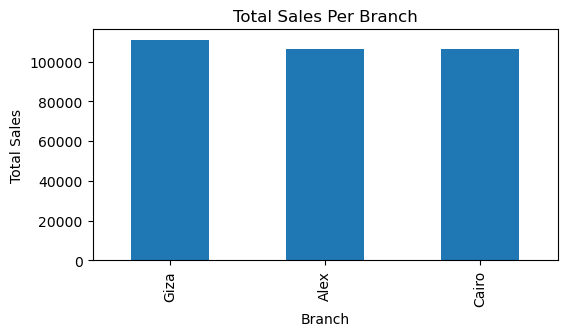

In [75]:
plt.figure(figsize=(6,3))
Branch_Sales.plot(kind="bar")
plt.title("Total Sales Per Branch")
plt.xlabel("Branch")
plt.ylabel("Total Sales")
plt.show()

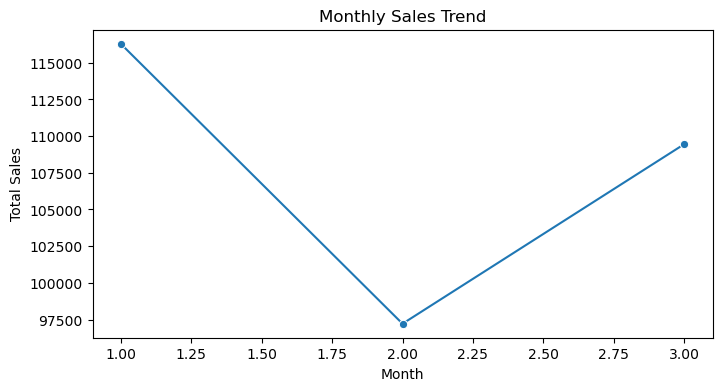

In [76]:
plt.figure(figsize=(8,4))
sns.lineplot(x=Monthly_Sales.index, y=Monthly_Sales.values, marker="o")
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()

In [72]:
print("Top Product Line:", Product_Sales.idxmax())
print("Top Branch:", Branch_Sales.idxmax())
print("Best Month:", Monthly_Sales.idxmax())

Top Product Line: Food and beverages
Top Branch: Giza
Best Month: 1


## Key Insights
- Certain product lines generate consistently higher sales than others
- One branch outperforms the rest in total revenue
- Sales levels vary noticeably across different months
- Some product lines show higher sales volatility


## Recommendations
- Focus marketing efforts on top-performing product lines
- Replicate successful strategies from the best-performing branch across other branches
- Prepare inventory and staffing ahead of high-sales months


## Conclusion
This project highlights how exploratory data analysis and visualization can uncover meaningful patterns and support data-driven business decisions.
